In [1]:
cd ..

/home/david/CS6140-MatchingPursuit


In [43]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of utils.dataset_utils failed: Traceback (most recent call last):
  File "/home/david/anaconda2/envs/cs7180/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/home/david/anaconda2/envs/cs7180/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 376, in superreload
    module = reload(module)
  File "/home/david/anaconda2/envs/cs7180/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/home/david/anaconda2/envs/cs7180/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call

In [68]:
from utils.dataset_utils import *
from utils.dictionary_generation import *
from utils.matching_pursuit import *

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm
from ipywidgets import interact, interactive, fixed, interact_manual, widgets

In [152]:
num_frames = 100

images = loadVideo("dataset/2011_09_26", num_frames)

In [153]:
print("Num images: ", len(images))
print("Image size: ", np.shape(images[0]))

Num images:  100
Image size:  (512, 1392)


In [154]:
images = cropImages(images )

In [155]:
def f(x):
    plt.imshow(images[x], cmap="Greys_r")
    plt.axis("off")
interact(f, x=widgets.IntSlider(min=0,max=num_frames-1,step=1,value=10))

interactive(children=(IntSlider(value=10, description='x', max=99), Output()), _dom_classes=('widget-interact'…

<function __main__.f(x)>

Num samples 1000


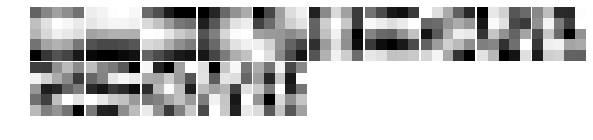

In [172]:
patch_size = 5
num_samples = 1000
num_features = 15
    
features = generatePCADictionary(images, patch_size, num_samples, num_features)
# features = np.concatenate((features, -features))

# features = generateOptSparseDictionary(images, patch_size, num_samples, num_features)
plotDictionary(features)

In [173]:
k = 1000
S_code = matchingPursuit(images[0], features, k)

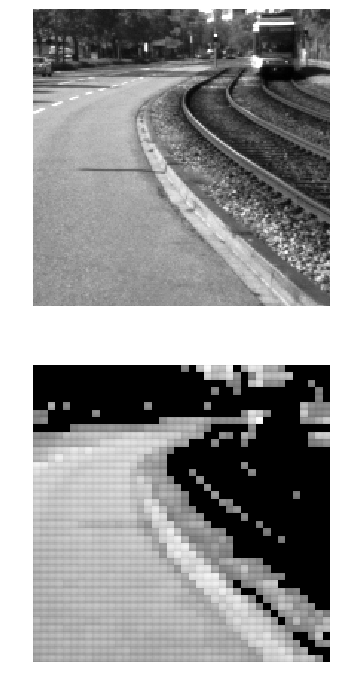

In [174]:
recon_image = generateReconImage(S_code, images[0], features)

#Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(18,12))
ax1.imshow(images[0], cmap="Greys_r")
ax1.axis("off")

ax2.imshow(recon_image, cmap="Greys_r")
ax2.axis("off")

plt.show()